In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
# Load the dataset
phishing_dataset = np.genfromtxt('Documents/Hands-On-Artificial-Intelligence-for-Cybersecurity-master/Chapter03/datasets/phishing_dataset.csv', delimiter=',', dtype=np.int32)

In [4]:
samples = phishing_dataset[:, :-1]
targets = phishing_dataset[:, -1]

In [5]:
training_samples, testing_samples, training_targets, testing_targets = train_test_split(samples, targets, test_size=0.2, random_state=0)

In [7]:
tree_classifier = DecisionTreeClassifier()

In [8]:
tree_classifier.fit(training_samples, training_targets)

DecisionTreeClassifier()

In [9]:
predictions = tree_classifier.predict(testing_samples)

In [10]:
conf_matrix = confusion_matrix(testing_targets, predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 960   54]
 [  30 1167]]


In [12]:
TP = conf_matrix[0, 0]
TN = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
accuracy_manual = (TP + TN) / (TP + TN + FP + FN)
print("Accuracy (Manual): {:.2f}%".format(accuracy_manual * 100))

Accuracy (Manual): 96.20%


In [13]:
acc_score = accuracy_score(testing_targets, predictions)
print("Accuracy (Scikit-Learn): {:.2f}%".format(acc_score * 100))

Accuracy (Scikit-Learn): 96.20%


In [14]:
plt.figure(figsize=(8, 6))
categories = ['True Positives', 'True Negatives', 'False Positives', 'False Negatives']
counts = [conf_matrix[0, 0], conf_matrix[1, 1], conf_matrix[0, 1], conf_matrix[1, 0]]

<Figure size 576x432 with 0 Axes>

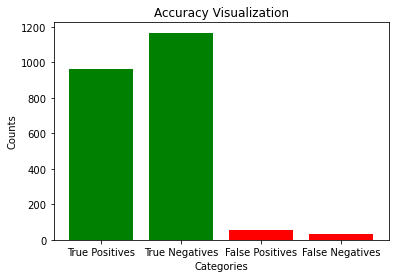

In [15]:
plt.bar(categories, counts, color=['green', 'green', 'red', 'red'])
plt.title('Accuracy Visualization')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.show()